In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt

if not pt.started():
    pt.init()

import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', False)

import pyt_splade
splade = pyt_splade.Splade()

dataset_name = 'msmarco-passage'
eval_ds_name = 'dev'
dataset = pt.get_dataset(f'irds:{dataset_name}')
eval_dataset = pt.get_dataset(f'irds:{dataset_name}/{eval_ds_name}')
topics = eval_dataset.get_topics()
qrels = eval_dataset.get_qrels()

In [ ]:
dataset_df = pd.DataFrame(dataset.get_corpus_iter(verbose=True))

In [ ]:
import numpy as np
dataset_df['rtr_score'] = np.zeros(dataset_df.shape[0])

In [ ]:
dataset_df['docid'] = dataset_df['docno'].astype(int)

In [ ]:
dataset_df.dtypes

In [ ]:
#################### bm25 ###########################

In [ ]:
bm25 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25.csv')

In [ ]:
bm25 = bm25.groupby(['docid'])['docid'].count()
bm25 = bm25.to_frame('rtr_cnt').reset_index()
bm25 = bm25.sort_values(by='rtr_cnt')
total = bm25['rtr_cnt'].sum()

In [ ]:
bm25.columns.to_list()

In [ ]:
bm25.head(10)

In [ ]:
# bm25.index.name = 'no'
# bm25 = bm25.rename(columns = {'docid':'count'})

In [ ]:
bm25['rtr_score'] = bm25['rtr_cnt']/total # normalisation

In [ ]:
bm25.tail(10)

In [ ]:
def set_score(df,row):
    docid = row['docid'] # int.64 to str
    rtr_score = row['rtr_score']
    # print(row.name)
    df.loc[docid,'rtr_score'] = rtr_score

In [ ]:
dataset_bm25 = dataset_df.copy()
for _, row in bm25.iterrows():
    set_score(dataset_bm25, row)

In [ ]:
dataset_bm25[dataset_bm25['rtr_score'] > 0].head(10)

In [ ]:
####################### bm25 >> monot5 ###############################

In [ ]:
# monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_r100.csv',) # 100 docs retrieved for each query.
monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_r10.csv')

In [ ]:
monot5.shape

In [ ]:
# monot5 = monot5.sort_values(by=['docid','rank'], ascending=[True, True])

In [ ]:
# monot5 = monot5.groupby(['docid']).head(10)

In [ ]:
monot5 = monot5.groupby(['docid'])['docid'].count()
monot5 = monot5.to_frame('rtr_cnt').reset_index()
monot5 = monot5.sort_values(by='rtr_cnt')
total = monot5['rtr_cnt'].sum()
monot5['rtr_score'] = monot5['rtr_cnt']/total # normalisation


In [ ]:
dataset_monot5 = dataset_df.copy()
for _, row in monot5.iterrows():
    set_score(dataset_monot5, row)

In [ ]:
dataset_monot5[dataset_monot5['rtr_score'] > 0].shape

In [ ]:
################ splade  ##################################

In [ ]:
splade = pd.read_csv('/nfs/primary/retrievability-bias/results_splade.csv',) # 100 docs retrieved for each query.

In [ ]:
splade.columns.to_list()

In [ ]:
splade = splade.groupby(['docid'])['docid'].count()
splade = splade.to_frame('rtr_cnt').reset_index()
splade = splade.sort_values(by='rtr_cnt')
total = splade['rtr_cnt'].sum()
splade['rtr_score'] = splade['rtr_cnt']/total # normalisation

In [ ]:
splade.shape

In [ ]:
dataset_splade = dataset_df.copy()
for _, row in splade.iterrows():
    set_score(dataset_splade, row)

In [ ]:
dataset_splade[dataset_splade['rtr_score'] > 0].shape

In [ ]:
dataset_bm25 = dataset_bm25.sort_values(by='rtr_score',ascending=False)
# dataset_bm25.to_csv('/nfs/datasets/cxj/retrievability-bias/dataset_bm25.csv')

In [ ]:
dataset_monot5 = dataset_monot5.sort_values(by='rtr_score',ascending=False)
# dataset_monot5.to_csv('/nfs/datasets/cxj/retrievability-bias/dataset_monot5.csv')

In [ ]:
dataset_splade = dataset_splade.sort_values(by='rtr_score',ascending=False)
# dataset_splade.to_csv('/nfs/datasets/cxj/retrievability-bias/dataset_splade.csv')

In [57]:
num_docs = max(bm25.shape[0],monot5.shape[0],splade.shape[0])
split = 100
intv = int(num_docs/split)

In [58]:
intv

8889

In [59]:
bm25_scores = []
for i in range(0,num_docs,intv):
    bm25_scores.append(dataset_bm25[i:i+intv]['rtr_score'].sum())

bm25_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [60]:
bm25_scores

[0.07360544930988398,
 0.030842294669097464,
 0.026379020236082677,
 0.02375565946561389,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.017586013490721794,
 0.0155878276851611,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745360897,
 0.008793006745

In [61]:
monot5_scores = []
for i in range(0,num_docs,intv):
    monot5_scores.append(dataset_monot5[i:i+intv]['rtr_score'].sum())

monot5_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [62]:
len(monot5_scores)

102

In [63]:
splade_scores = []
for i in range(0,num_docs,intv):
    splade_scores.append(dataset_splade[i:i+intv]['rtr_score'].sum())

splade_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [64]:
len(splade_scores)

102

In [65]:
scale_num = max(len(bm25_scores),len(monot5_scores),len(splade_scores))
scale_num

102

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x_ticks = np.arange(1,scale_num +1)
x_ticks

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

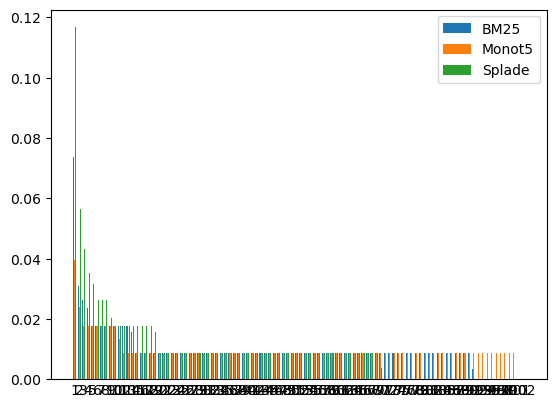

In [67]:

# a = np.random.random(intv)
# b = np.random.random(intv)
# c = np.random.random(intv)

total_width, n = 0.7, 3
width = total_width / n
x = x_ticks
x = x - (total_width - width) / 2

plt.bar(x, bm25_scores,  width=width, label='BM25')
plt.bar(x + width, monot5_scores, width=width, label='Monot5')
plt.bar(x + 2 * width, splade_scores, width=width, label='Splade')

plt.tick_params(axis='x',length=0)
plt.xticks(ticks=x_ticks, labels=None)
plt.legend()
plt.show()